# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### center of objects with moment

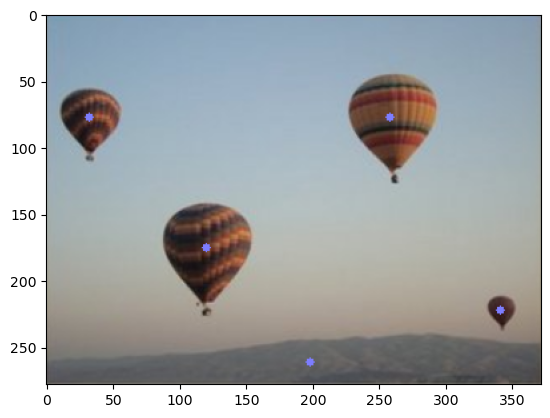

In [13]:
# read image
image = cv2.imread("images/balloon.png")

#convert to gray
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# threshold to binary
_,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)


# Let's define our kernel size
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5), (2, 2))
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# find contours
contours,herirachy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# moments
for i in contours:
    M = cv2.moments(i)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.circle(image,(cx,cy), 3,(255,125,125),-1)
    
# show image
plt.imshow(image[...,::-1])

### area of each object

In [14]:
def get_area(contours):
    all_contours = []
    for i in contours:
        area = cv2.contourArea(i)
        all_contours.append(area)
    return all_contours
        
# read image
image = cv2.imread("images/balloon.png")
copy_img = image.copy()

#convert to gray
gray = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)

# threshold to binary
_,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)


# Let's define our kernel size
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5), (2, 2))
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# find contours
contours,herirachy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# sortes contours large to small
sorted_contours = sorted(contours, key = cv2.contourArea, reverse= True) 

print('Sorted contours area')
print(get_area(sorted_contours))



Sorted contours area
[11060.0, 3408.5, 3133.5, 1491.5, 337.5]


### Draw them

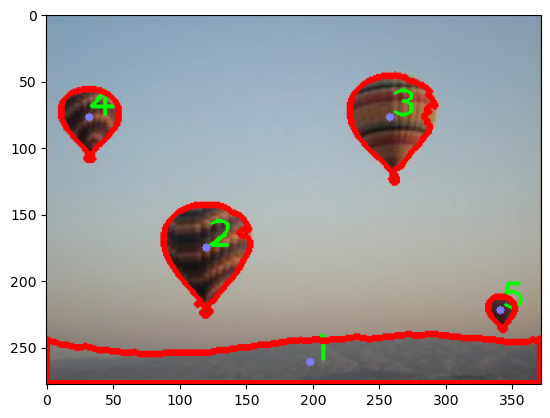

In [15]:
for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.circle(copy_img,(cx,cy), 3,(255,125,125),-1)
    cv2.putText(copy_img, str(i+1),(cx,cy), cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),2)
    cv2.drawContours(copy_img,[c], -1,(0,0,255),3)
    
plt.imshow(copy_img[...,::-1])